## This is the Submission of Data Wrangling Team Project - Group 1 - Part 3
### Topic: The eCommerce1c Analysis Dataset is now ready for Statistical Analysis and Modelling.
### This is a continutaion of Df8 (saved as eCommerceAnalysis_Df8_Group1_r01.csv), for Analysis and Modelling.

In [11]:
## setting up - import the necessary packages ##
import os
#import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import missingno as missno
from matplotlib import rcParams
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from matplotlib import cm
#from pandas_profiling import ProfileReport
#os.getcwd()

# Change directory # C:\Users\louis\My Python Coding Space\Advanced python Course Codes # "C:\Users\louis\M5 DW Code"
os.chdir('C:\\Users\\wooo_\\OneDrive\\Desktop\\SUTD Notes\\Data Wrangling with Programming\\Group Project\\Large Dataset (Group1)')

### Reading the Df8 from eCommerceDataset1_Group1_r01.csv file

In [12]:
## Read the eCommerce Dataset

Df8 = pd.read_csv("eCommerceAnalysis_Df8_Group1_r01.csv", header=0) 

print(Df8)

        item_id order_status        date  Customer_ID    Country  Regions  \
0        211131     complete    7/1/2016            1  Australia  Oceania   
1        211133     canceled    7/1/2016            2  Australia  Oceania   
2        324257     canceled  11/25/2016            2  Australia  Oceania   
3        211134     canceled    7/1/2016            3  Australia  Oceania   
4        473369     complete   5/19/2017            3  Australia  Oceania   
...         ...          ...         ...          ...        ...      ...   
582063   904365     received   8/25/2018       115185    Belgium   Europe   
582064   904607     canceled   8/26/2018       115222    Belgium   Europe   
582065   904608     canceled   8/26/2018       115222    Belgium   Europe   
582066   904796     canceled   8/27/2018       115259    Belgium   Europe   
582067   904987       holded   8/27/2018       115296    Belgium   Europe   

                                      product_description   product_categor

# Inspecting the dataset

In [109]:
print(Df8.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582068 entries, 0 to 582067
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   item_id              582068 non-null  int64  
 1   order_status         582054 non-null  object 
 2   date                 582068 non-null  object 
 3   Customer_ID          582068 non-null  int64  
 4   Country              582068 non-null  object 
 5   Regions              582068 non-null  object 
 6   product_description  582065 non-null  object 
 7   product_category     582068 non-null  object 
 8   quantity             582068 non-null  int64  
 9   unit_price           582068 non-null  float64
 10  sales                582068 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 48.8+ MB
None


## Quick check of the data, plots

<Figure size 1600x1600 with 0 Axes>

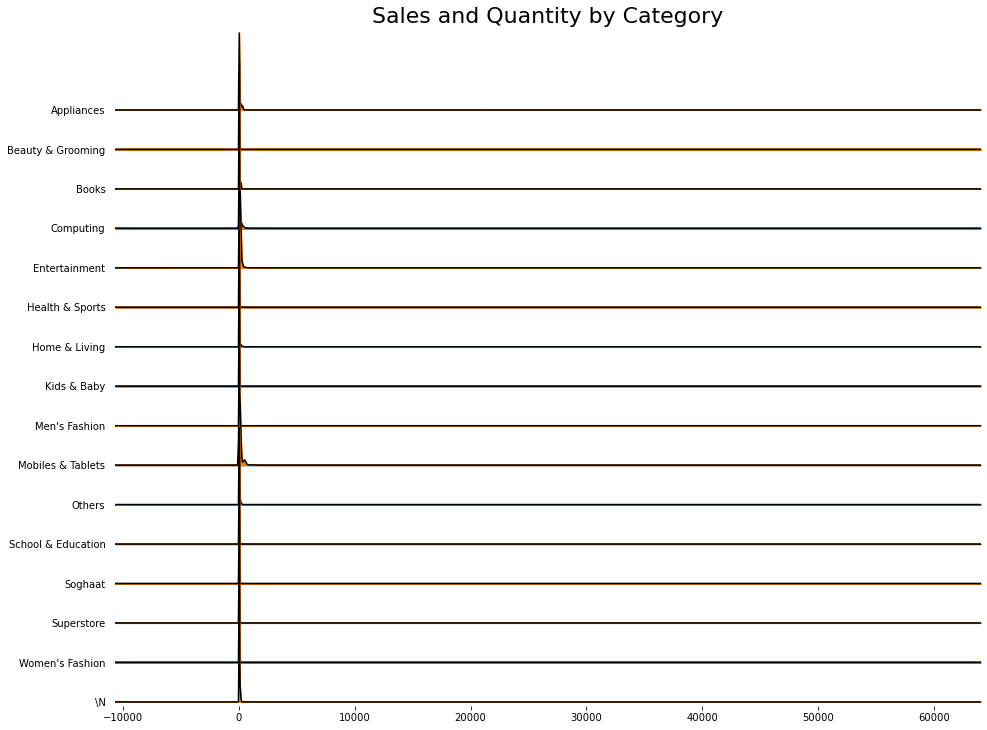

In [87]:
# !pip install joypy
import joypy

# Import Data

# Draw Plot

plt.figure(figsize=(16,16), dpi= 100)
fig, axes = joypy.joyplot(Df8, column=['quantity','sales'], by="product_category", ylim='own', figsize=(14,10))

# Decoration


plt.title('Sales and Quantity by Category', fontsize=22)

plt.show()

### From the chart above we notice the Dataset has a very wide range on both price and quantity,
### But it was concentrated in the lower arrange.

### Below is to arrange for the lower range for the lower range (to equal or less than 10 pieces or $10):
### Df8 ==> Df9

In [110]:
# Df8 = pd.read_csv("eCommerceAnalysis_Df8_Group1_r01.csv", header=0) 

Df9 = Df8

Df9["More_10"] = Df9["unit_price"] - 10.0
a = Df9["More_10"]
 
a[a < 0] = 0

Df9["More_10"] = a

Df9["sales_10"] = Df9["unit_price"] - Df9["More_10"]

print(Df9)

        item_id order_status        date  Customer_ID    Country  Regions  \
0        211131     complete    7/1/2016            1  Australia  Oceania   
1        211133     canceled    7/1/2016            2  Australia  Oceania   
2        324257     canceled  11/25/2016            2  Australia  Oceania   
3        211134     canceled    7/1/2016            3  Australia  Oceania   
4        473369     complete   5/19/2017            3  Australia  Oceania   
...         ...          ...         ...          ...        ...      ...   
582063   904365     received   8/25/2018       115185    Belgium   Europe   
582064   904607     canceled   8/26/2018       115222    Belgium   Europe   
582065   904608     canceled   8/26/2018       115222    Belgium   Europe   
582066   904796     canceled   8/27/2018       115259    Belgium   Europe   
582067   904987       holded   8/27/2018       115296    Belgium   Europe   

                                      product_description   product_categor

<ipython-input-110-a9c7d544cfd6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[a < 0] = 0


### Removing the negative values.

In [111]:
Df9["qty_m10"] = Df9["quantity"] - 10.0
b = Df9["qty_m10"]
 
b[b < 0] = 0

Df9["qty_over10"] = b

Df9["qty_10"] = Df9["quantity"] - Df9["qty_over10"]

print(Df9)

        item_id order_status        date  Customer_ID    Country  Regions  \
0        211131     complete    7/1/2016            1  Australia  Oceania   
1        211133     canceled    7/1/2016            2  Australia  Oceania   
2        324257     canceled  11/25/2016            2  Australia  Oceania   
3        211134     canceled    7/1/2016            3  Australia  Oceania   
4        473369     complete   5/19/2017            3  Australia  Oceania   
...         ...          ...         ...          ...        ...      ...   
582063   904365     received   8/25/2018       115185    Belgium   Europe   
582064   904607     canceled   8/26/2018       115222    Belgium   Europe   
582065   904608     canceled   8/26/2018       115222    Belgium   Europe   
582066   904796     canceled   8/27/2018       115259    Belgium   Europe   
582067   904987       holded   8/27/2018       115296    Belgium   Europe   

                                      product_description   product_categor

<ipython-input-111-43307ebc408d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b[b < 0] = 0


## Re-do the Distribution plot (using qty_10 and Sales_10):

<Figure size 1600x1600 with 0 Axes>

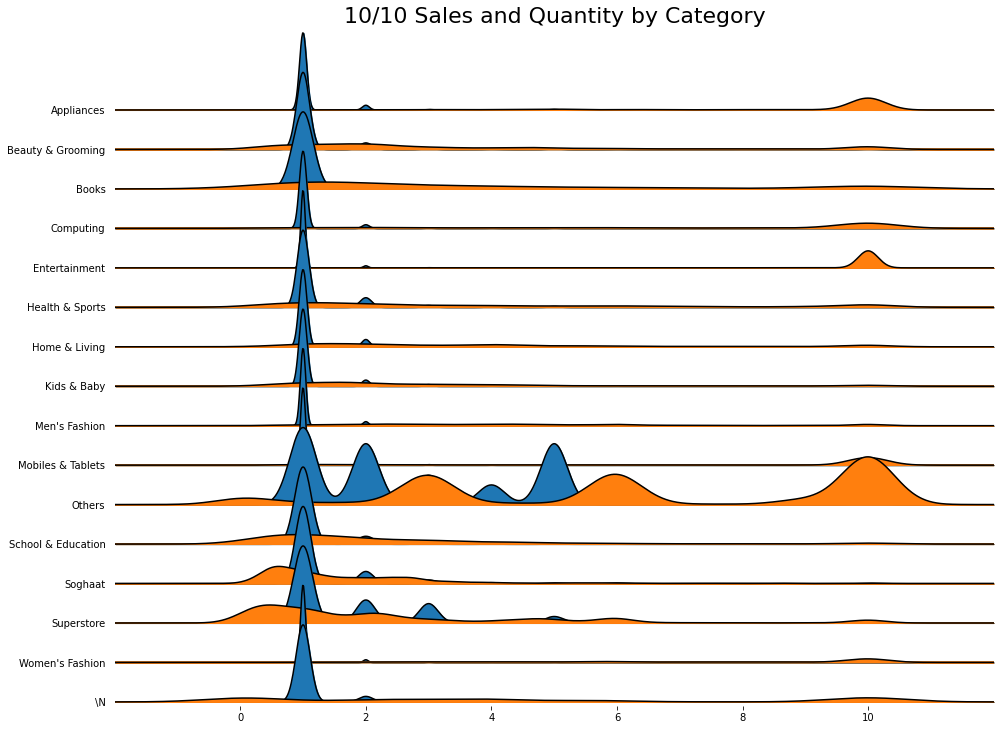

In [100]:
# !pip install joypy
import joypy

# Import Data

# Draw Plot

plt.figure(figsize=(16,16), dpi= 100)
fig, axes = joypy.joyplot(Df9, column=['qty_10','sales_10'], by="product_category", ylim='own', figsize=(14,10))

# Decoration


plt.title('10/10 Sales and Quantity by Category', fontsize=22)

plt.show()

<Figure size 1600x1600 with 0 Axes>

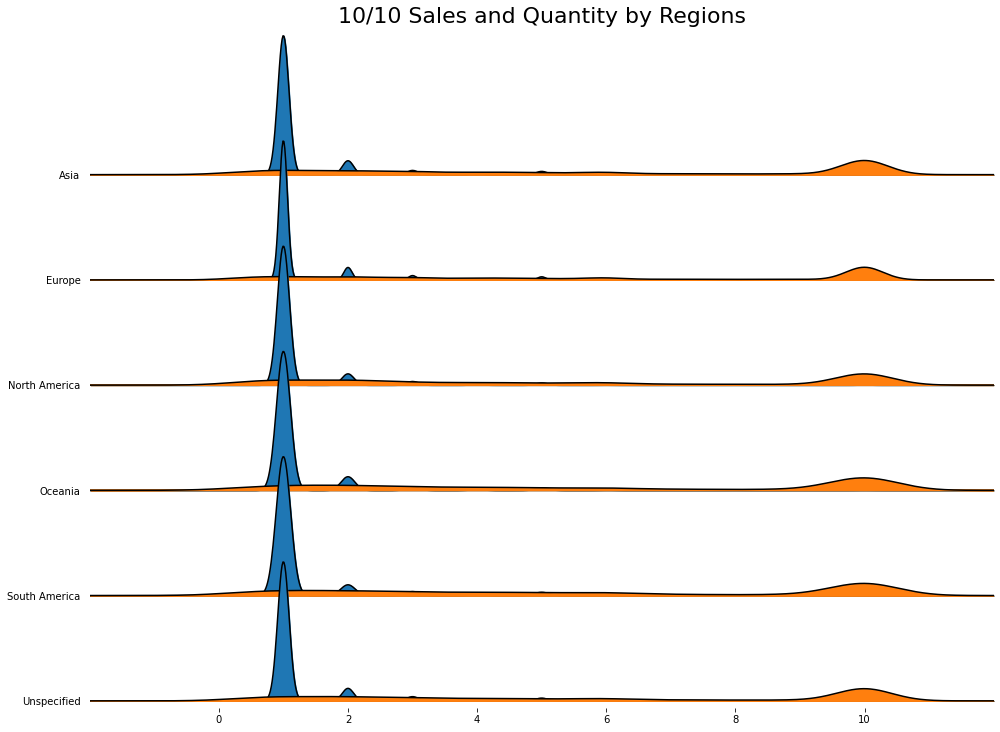

In [101]:
# !pip install joypy
import joypy

# Import Data

# Draw Plot

plt.figure(figsize=(16,16), dpi= 100)
fig, axes = joypy.joyplot(Df9, column=['qty_10','sales_10'], by="Regions", ylim='own', figsize=(14,10))

# Decoration


plt.title('10/10 Sales and Quantity by Regions', fontsize=22)

plt.show()

### Other Plots:

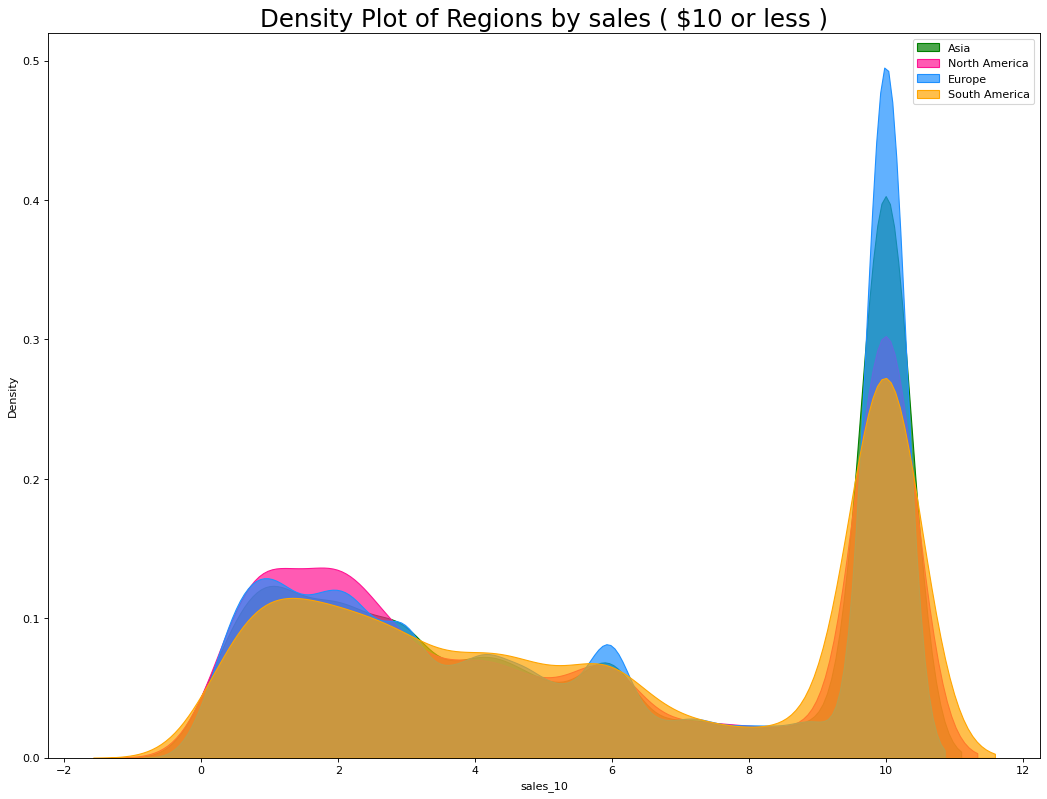

In [102]:

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
sns.kdeplot(Df8.loc[Df8['Regions'] == "Asia", 'sales_10'], shade=True, color="g", label="Asia", alpha=.7)
sns.kdeplot(Df8.loc[Df8['Regions'] == "North America", 'sales_10'], shade=True, color="deeppink", label="North America", alpha=.7)
sns.kdeplot(Df8.loc[Df8['Regions'] == "Europe", 'sales_10'], shade=True, color="dodgerblue", label="Europe", alpha=.7)
sns.kdeplot(Df8.loc[Df8['Regions'] == "South America", 'sales_10'], shade=True, color="orange", label="South America", alpha=.7)

# Decoration
plt.title('Density Plot of Regions by sales ( $10 or less )', fontsize=22)
plt.legend()
plt.show()


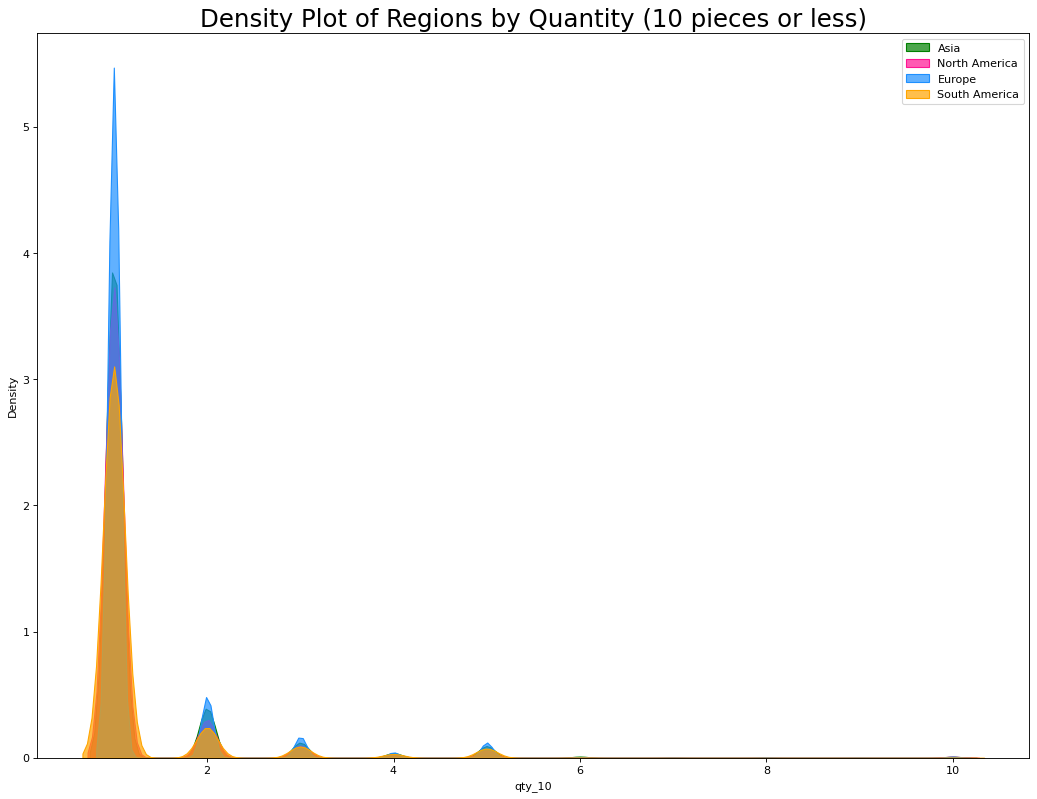

In [103]:

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
sns.kdeplot(Df8.loc[Df8['Regions'] == "Asia", 'qty_10'], shade=True, color="g", label="Asia", alpha=.7)
sns.kdeplot(Df8.loc[Df8['Regions'] == "North America", 'qty_10'], shade=True, color="deeppink", label="North America", alpha=.7)
sns.kdeplot(Df8.loc[Df8['Regions'] == "Europe", 'qty_10'], shade=True, color="dodgerblue", label="Europe", alpha=.7)
sns.kdeplot(Df8.loc[Df8['Regions'] == "South America", 'qty_10'], shade=True, color="orange", label="South America", alpha=.7)

# Decoration
plt.title('Density Plot of Regions by Quantity (10 pieces or less)', fontsize=22)
plt.legend()
plt.show()

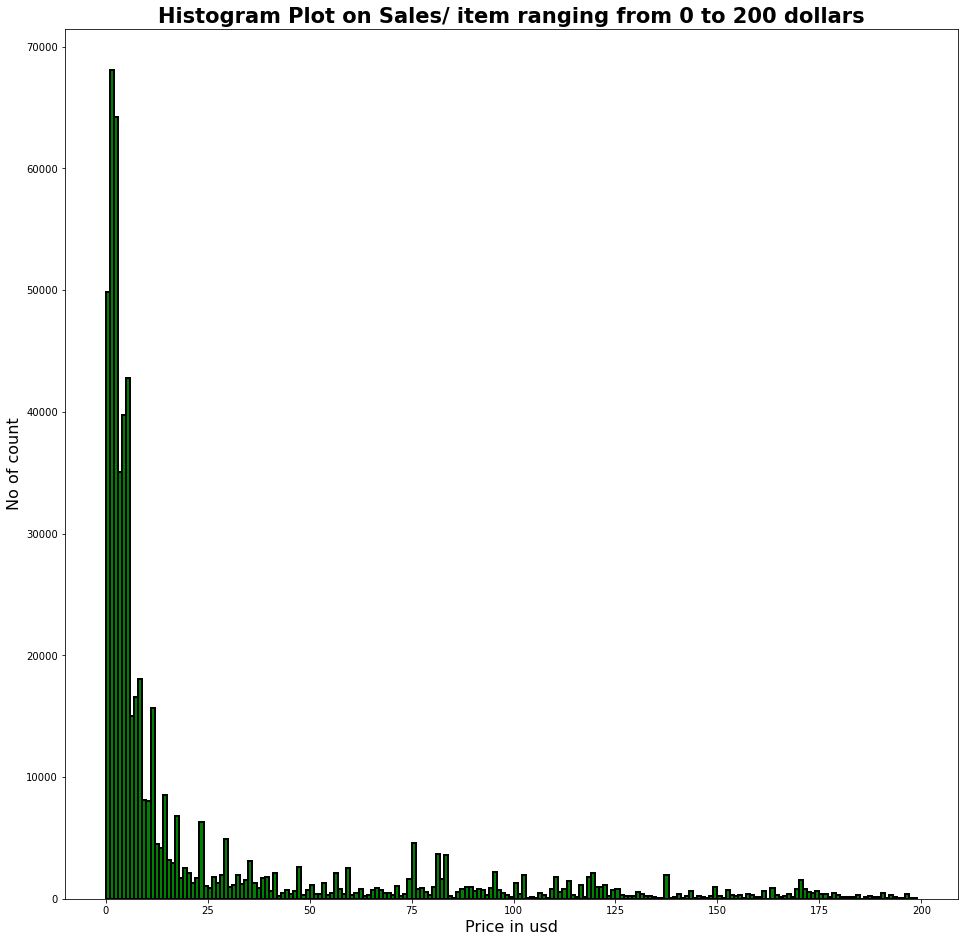

In [104]:
plt.rcParams['figure.figsize'] = 16, 16

n, bins, patches = plt.hist(Df9.sales, bins = range(0, 200), color = ['green'], edgecolor='black',linewidth=(2))

plt.title("Histogram Plot on Sales/ item ranging from 0 to 200 dollars", fontweight="bold",fontsize=21)
plt.xlabel('Price in usd', fontsize=16)
plt.ylabel('No of count', fontsize=16)
plt.show()

No handles with labels found to put in legend.


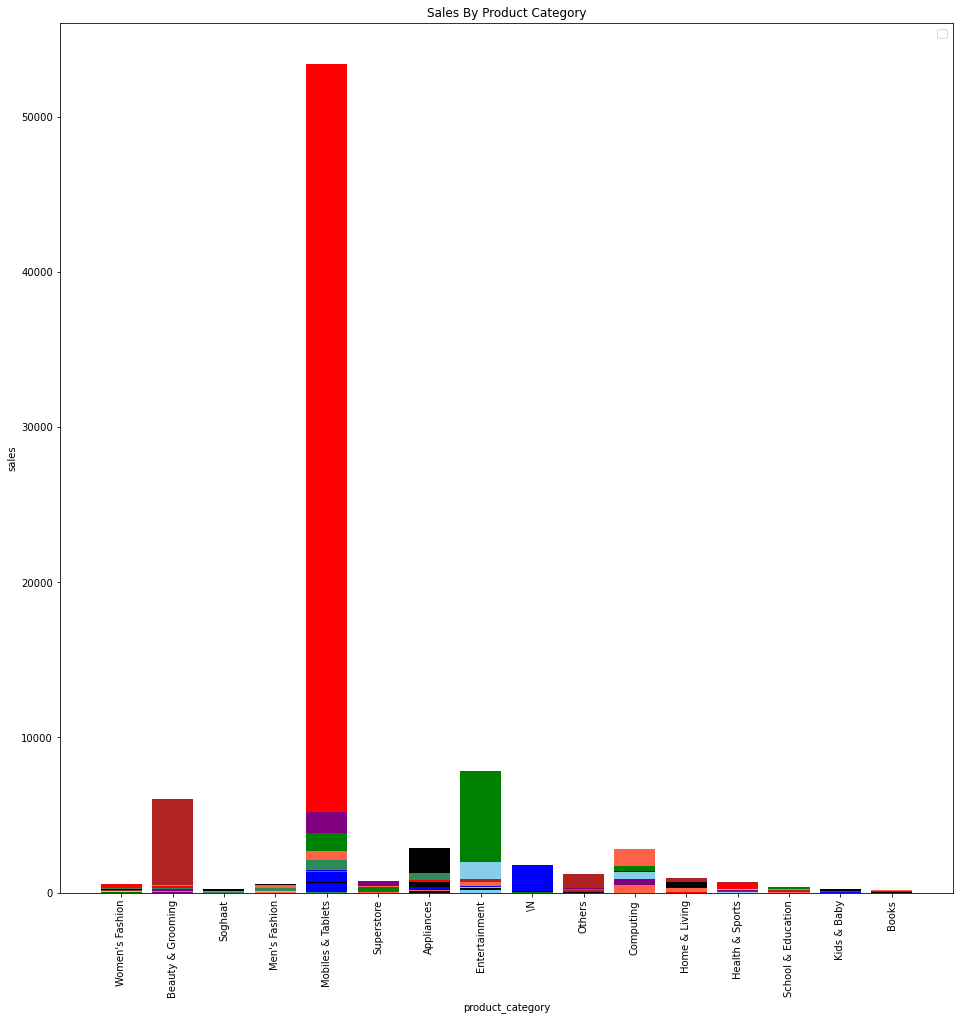

In [105]:

x = Df9["product_category"]
y = Df9["sales"]

plt.bar(x,y, color=['firebrick', 'green', 'blue', 'black', 'red','purple', 'seagreen', 'skyblue', 'black', 'tomato'])

plt.xlabel('product_category')
plt.ylabel("sales")
plt.title('Sales By Product Category')
plt.xticks(rotation=90)
plt.legend(fontsize=12) 

plt.show()


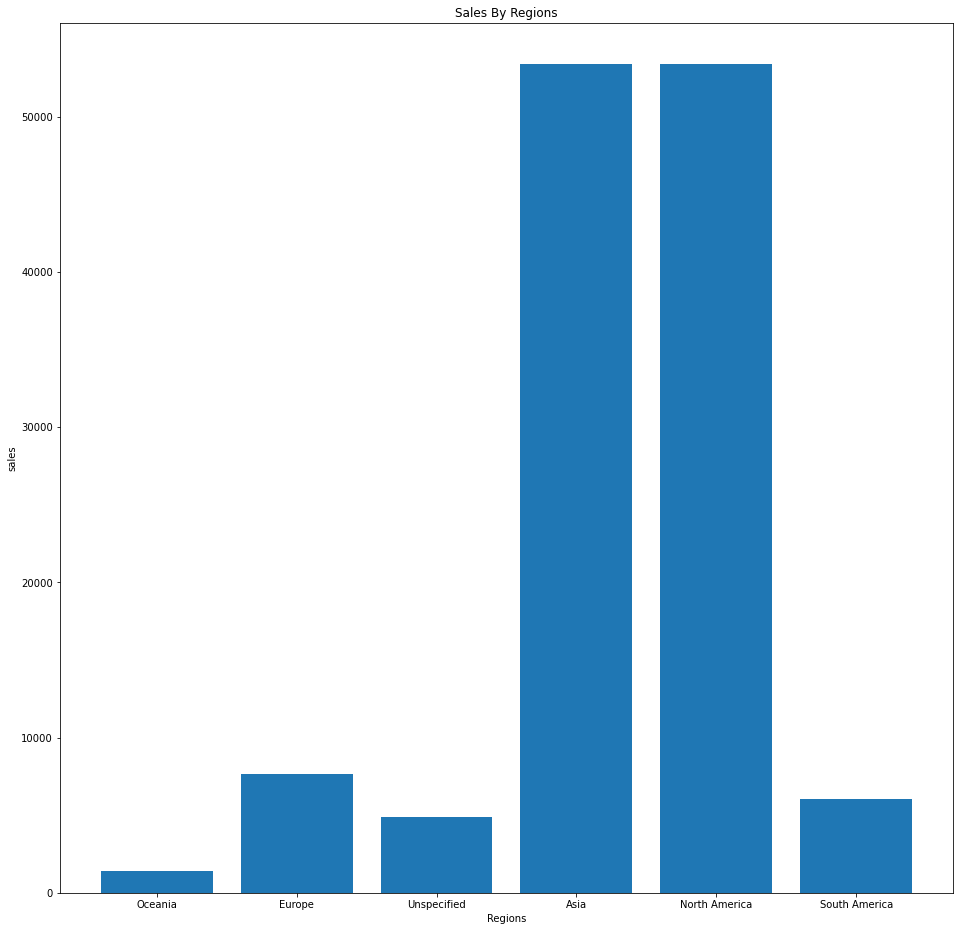

In [96]:
x = Df9["Regions"]
y = Df9["sales"]

plt.rcParams['figure.figsize'] = 16, 16

plt.bar(x,y)

plt.xlabel('Regions')
plt.ylabel("sales")
plt.title('Sales By Regions')

plt.show()

In [113]:
print(Df9)

Df9.to_csv('eCommerceAnalysis_Df9_Group1_r02.csv', index=False)


        item_id order_status        date  Customer_ID    Country  Regions  \
0        211131     complete    7/1/2016            1  Australia  Oceania   
1        211133     canceled    7/1/2016            2  Australia  Oceania   
2        324257     canceled  11/25/2016            2  Australia  Oceania   
3        211134     canceled    7/1/2016            3  Australia  Oceania   
4        473369     complete   5/19/2017            3  Australia  Oceania   
...         ...          ...         ...          ...        ...      ...   
582063   904365     received   8/25/2018       115185    Belgium   Europe   
582064   904607     canceled   8/26/2018       115222    Belgium   Europe   
582065   904608     canceled   8/26/2018       115222    Belgium   Europe   
582066   904796     canceled   8/27/2018       115259    Belgium   Europe   
582067   904987       holded   8/27/2018       115296    Belgium   Europe   

                                      product_description   product_categor

In [119]:
DfV = pd.read_csv('eCommerceAnalysis_Df9_Group1_r02.csv')

print()
print("DfV = Verification Df: ")
print(DfV)


DfV = Verification Df: 
        item_id order_status        date  Customer_ID    Country  Regions  \
0        211131     complete    7/1/2016            1  Australia  Oceania   
1        211133     canceled    7/1/2016            2  Australia  Oceania   
2        324257     canceled  11/25/2016            2  Australia  Oceania   
3        211134     canceled    7/1/2016            3  Australia  Oceania   
4        473369     complete   5/19/2017            3  Australia  Oceania   
...         ...          ...         ...          ...        ...      ...   
582063   904365     received   8/25/2018       115185    Belgium   Europe   
582064   904607     canceled   8/26/2018       115222    Belgium   Europe   
582065   904608     canceled   8/26/2018       115222    Belgium   Europe   
582066   904796     canceled   8/27/2018       115259    Belgium   Europe   
582067   904987       holded   8/27/2018       115296    Belgium   Europe   

                                      product_desc

## Conclusion:
### 1. The Wrangling of the Dataset is completed.
### 2. More cleaning and enhancement maybe needed depending on the type of analysis is required.
### 3. The next steps is to do the statistical analysis (more depth analysis, like regression, correlation, etc.)
### 4. Basing on the statistical analysis, modelling would be required, like Sales projection etc.

## End of Part 3 - Wrangling of large Data.